<a href="https://colab.research.google.com/github/flapinski/optimization/blob/main/Ass1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import numpy as np
import pandas as pd
from scipy.stats import ncx2
from scipy import optimize as opt
import matplotlib.pyplot as plt


In [5]:
def cirpdf(y, t, a, b, sigma):
    """
    Generate a vectorised CIR distribuion from noncentral chi-square distribution.

        dX = a(b - X)dt + sigma*sqrt(X) dW

    The CIR pdf is related to the Chi distribution with 2q+2 degrees of freedom and non-centrality parameter

    Args:
        y (numppy.array): a 1-d vector of evaluation points: [X_0, X_1, ..., X_n ]
        t (numpy.array): a 1-d vector of times:              [t_0, t_1, ..., t_n]
        a (float): parameter
        b (float): parameter
        sigma (float): parameter

    Returns:
        numpy.array: a 1-d vector of length n-1.

    Notes:
        For each probability density element two members of the input vectors y and t must be used. For example,
        if;
            x = [x_0, x_1, x_2] and
            t = [t_0, t_1, t_2]
        we can only obtain 2 probability density values;
            f_0 = f(x_1, t_1; x_0, t_0; a, b, sigma), the probability associated with evaluation point (x_1, t_1)
            f_1 = f(x_2, t_2,; x_1, t_1; a, b, sigma), the probability associated with the evaluation point (x_2, t_2)

        The returned result is the vector of length 2: [f_0, f_1]

    Doctests:
        >>> y = np.array([1.6,4.2,3,2.1])
        >>> t = np.array([1,2,3,4])
        >>> cirpdf(y, t, 1, 2, 0.2)
        array([  4.04336846e-23,   1.16777299e+00,   8.81371441e-01])
    """
    d = np.exp(-a * (t[1:] - t[:-1]))
    c = 2 * a / (sigma ** 2 * (1 - d))
    q = 2 * a * b / (sigma ** 2) - 1
    z = 2 * c * y[1:]  # <- transformed variable
    _lambda = 2 * c * y[:-1] * d  # <- non-centrality
    df = 2 * q + 2  # <- degrees of freedom
    if not (2 * a * b > sigma ** 2):  # <- check feller condition
        res = np.full(len(t) - 1, 1e-100)  # <- if fails return negligible probability density
    else:
        res = 2 * c * ncx2.pdf(z, df, _lambda)  # <- else return real probability density.
    return res


In [38]:
url = 'https://raw.githubusercontent.com/flapinski/optimization/main/CIRDataSet.csv'
df = pd.read_csv(url)
t = np.asarray(df['t'])
y = np.asarray(df['data'])

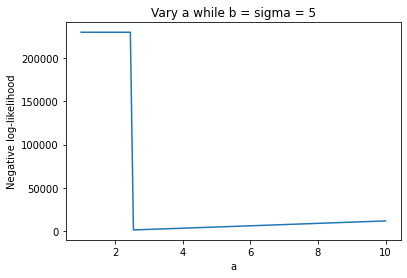

In [128]:
### TRY VARYING EACH OF THE PARAMETERS

def testfun(a,b,sigma):
  url = 'https://raw.githubusercontent.com/flapinski/optimization/main/CIRDataSet.csv'
  df = pd.read_csv(url)
  t = np.asarray(df['t'])
  y = np.asarray(df['data'])

  d = np.exp(-a * (t[1:] - t[:-1]))
  c = 2 * a / (sigma ** 2 * (1 - d))
  q = 2 * a * b / (sigma ** 2) - 1
  z = 2 * c * y[1:]  # <- transformed variable
  _lambda = 2 * c * y[:-1] * d  # <- non-centrality
  df = 2 * q + 2  # <- degrees of freedom
  if not (2 * a * b > sigma ** 2):  # <- check feller condition
    res = np.full(len(t) - 1, 1e-100)  # <- if fails return negligible probability density
  else:
      res = 2 * c * ncx2.pdf(z, df, _lambda)  # <- else return real probability density.

  negll = -sum(np.log(res))
  return negll

# Vary a
const = 5
res = []
x = np.linspace(1, 10, 100)

for var in x:
  res.append(testfun(var,const,const))

plt.plot(x,res,'-')
plt.xlabel('a')
plt.ylabel('Negative log-likelihood')
plt.title('Vary a while b = sigma = 5')
plt.show()

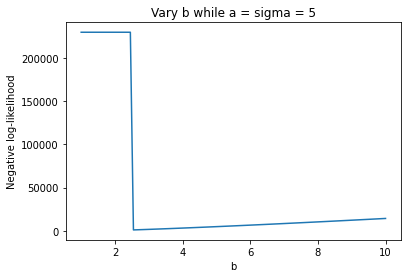

In [133]:
# Vary b
const = 5
res = []
x = np.linspace(1, 10, 100)

for var in x:
  res.append(testfun(const,var,const))

plt.plot(x,res,'-')
plt.xlabel('b')
plt.ylabel('Negative log-likelihood')
plt.title('Vary b while a = sigma = 5')
plt.show()

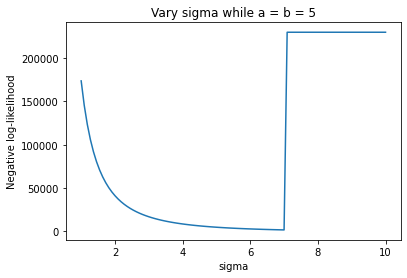

In [132]:
# Vary sigma
const = 5
res = []
x = np.linspace(1, 10, 100)

for var in x:
  res.append(testfun(const,const,var))

plt.plot(x,res,'-')
plt.xlabel('sigma')
plt.ylabel('Negative log-likelihood')
plt.title('Vary sigma while a = b = 5')
plt.show()

In [61]:
def obj(par):
  url = 'https://raw.githubusercontent.com/flapinski/optimization/main/CIRDataSet.csv'
  df = pd.read_csv(url)
  t = np.asarray(df['t'])
  y = np.asarray(df['data'])

  a = par[0]
  b = par[1]
  sigma = par[2]

  d = np.exp(-a * (t[1:] - t[:-1]))
  c = 2 * a / (sigma ** 2 * (1 - d))
  q = 2 * a * b / (sigma ** 2) - 1
  z = 2 * c * y[1:]  # <- transformed variable
  _lambda = 2 * c * y[:-1] * d  # <- non-centrality
  df = 2 * q + 2  # <- degrees of freedom
  if not (2 * a * b > sigma ** 2):  # <- check feller condition
    res = np.full(len(t) - 1, 1e-100)  # <- if fails return negligible probability density
  else:
      res = 2 * c * ncx2.pdf(z, df, _lambda)  # <- else return real probability density.

  negll = -sum(np.log(res))
  return negll


230028.25079010037

In [110]:
guess = (0.97,2.5,1)
opt.minimize(obj, guess, method = 'Nelder-Mead')

 final_simplex: (array([[0.8003988 , 1.22846793, 1.40232967],
       [0.80039873, 1.22846809, 1.40232971],
       [0.80039872, 1.22846813, 1.40232972],
       [0.80039872, 1.22846813, 1.40232972]]), array([-708.36110392, -708.36104604, -708.36103309, -708.36103191]))
           fun: -708.3611039248154
       message: 'Optimization terminated successfully.'
          nfev: 562
           nit: 296
        status: 0
       success: True
             x: array([0.8003988 , 1.22846793, 1.40232967])